In [68]:
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import boxcox
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier

import xgboost as xgb

RSEED=42

sns.set_context('talk')
plt.style.use(['dark_background'])
#plt.rcParams['image.cmap'] = "orangered"
plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [69]:
data = pd.read_csv("./data/data_prep_clf.csv", index_col=[0])

In [70]:
data_b=data.drop(["target",'trafic_airquality', '6fold_airquality'],axis=1)

In [71]:
data_b.columns

Index(['location', 'max_temp', 'min_temp', 'mean_temp', 'std_temp', 'var_temp',
       'median_temp', 'ptp_temp', 'max_precip', 'min_precip', 'mean_precip',
       'std_precip', 'var_precip', 'median_precip', 'ptp_precip',
       'max_rel_humidity', 'min_rel_humidity', 'mean_rel_humidity',
       'std_rel_humidity', 'var_rel_humidity', 'median_rel_humidity',
       'ptp_rel_humidity', 'max_wind_dir', 'min_wind_dir', 'mean_wind_dir',
       'std_wind_dir', 'var_wind_dir', 'median_wind_dir', 'ptp_wind_dir',
       'max_wind_spd', 'min_wind_spd', 'mean_wind_spd', 'std_wind_spd',
       'var_wind_spd', 'median_wind_spd', 'ptp_wind_spd', 'max_atmos_press',
       'min_atmos_press', 'mean_atmos_press', 'std_atmos_press',
       'var_atmos_press', 'median_atmos_press', 'ptp_atmos_press',
       'Bi_airquality'],
      dtype='object')

In [72]:
column_names = ['location', 'max_temp', 'min_temp', 'mean_temp', 'std_temp', 'var_temp',
       'median_temp', 'ptp_temp', 'max_precip', 'min_precip', 'mean_precip',
       'std_precip', 'var_precip', 'median_precip', 'ptp_precip',
       'max_rel_humidity', 'min_rel_humidity', 'mean_rel_humidity',
       'std_rel_humidity', 'var_rel_humidity', 'median_rel_humidity',
       'ptp_rel_humidity', 'max_wind_dir', 'min_wind_dir', 'mean_wind_dir',
       'std_wind_dir', 'var_wind_dir', 'median_wind_dir', 'ptp_wind_dir',
       'max_wind_spd', 'min_wind_spd', 'mean_wind_spd', 'std_wind_spd',
       'var_wind_spd', 'median_wind_spd', 'ptp_wind_spd', 'max_atmos_press',
       'min_atmos_press', 'mean_atmos_press', 'std_atmos_press',
       'var_atmos_press', 'median_atmos_press', 'ptp_atmos_press',
       'Bi_airquality']

In [73]:
from sklearn.model_selection import train_test_split

y=data_b["Bi_airquality"]
X= data_b.drop(["Bi_airquality"], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  stratify=y ,random_state=RSEED)

In [74]:
xgb1= XGBClassifier()

xgb1.fit(X_train,y_train)


[22:30:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
y_pred = xgb1.predict(X_test)

In [76]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
import itertools



In [77]:
confusion_matrix(y_pred, y_test)

array([[3073,  501],
       [ 291,  797]])

In [78]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         bad       0.91      0.86      0.89      3574
        good       0.61      0.73      0.67      1088

    accuracy                           0.83      4662
   macro avg       0.76      0.80      0.78      4662
weighted avg       0.84      0.83      0.84      4662



Confusion matrix, without normalization
[[3073  291]
 [ 501  797]]


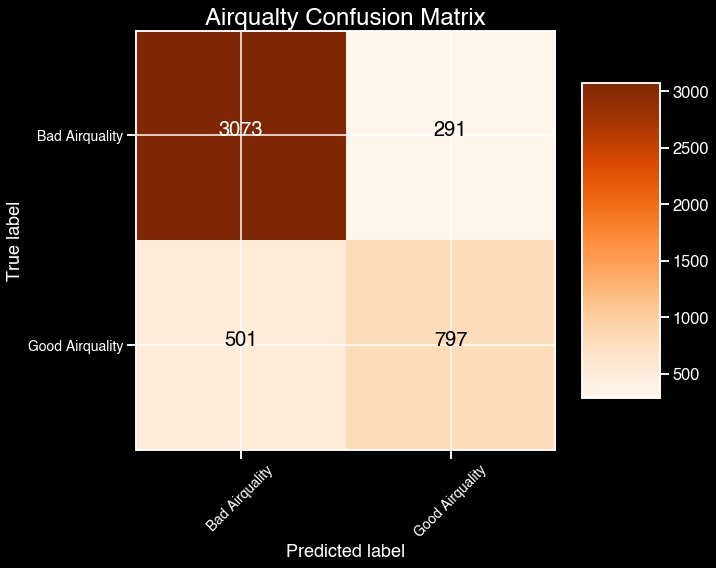

In [87]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Bad Airquality', 'Good Airquality'],
                      title = 'Airqualty Confusion Matrix')
# Evaluate your model 

## Tri

In [80]:
data_t = data_b=data.drop(["target",'Bi_airquality', '6fold_airquality'],axis=1)

In [81]:
data_t

,location,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,min_precip,...,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press,trafic_airquality
0,2,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,0.000,0.0,...,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500,yellow
1,3,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,0.0,...,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333,yellow
2,0,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,7.804,0.0,...,0.942500,2.420000,88.813333,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833,green
3,0,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,25.787,0.0,...,1.388333,2.469167,88.685000,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000,yellow
4,0,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,0.136,0.0,...,0.542917,1.796667,88.719167,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15534,0,27.841667,16.550000,20.573209,2.987662,8.926124,19.458333,11.291667,31.842,0.0,...,0.890000,2.194167,88.730000,87.890833,88.382934,0.187366,0.035106,88.393333,0.839167,yellow
15535,4,29.550000,18.991667,23.546832,2.614979,6.838117,23.208333,10.558333,9.046,0.0,...,1.094167,2.330833,88.704167,88.082500,88.435840,0.141562,0.020040,88.450000,0.621667,green
15536,3,34.108333,16.950000,24.637083,4.352597,18.945097,24.179167,17.158333,3.893,0.0,...,0.897500,3.608333,90.885000,90.145833,90.522397,0.161257,0.026004,90.520000,0.739167,yellow
15537,3,30.900000,15.891667,23.472934,4.651403,21.635547,23.066667,15.008333,0.017,0.0,...,0.828333,2.683333,90.793333,90.106667,90.486202,0.160746,0.025839,90.512500,0.686667,yellow


In [82]:
y=data_t["trafic_airquality"]
X= data_t.drop(["trafic_airquality"], axis =1)

In [83]:
from sklearn.model_selection import train_test_split

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RSEED)

In [84]:
xgb2= XGBClassifier()

xgb2.fit(X_train_t,y_train_t)


[22:30:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [85]:
y_pred_t = xgb2.predict(X_test_t)

Confusion matrix, without normalization
[[ 838    1  459]
 [   1   67  119]
 [ 303   27 2847]]


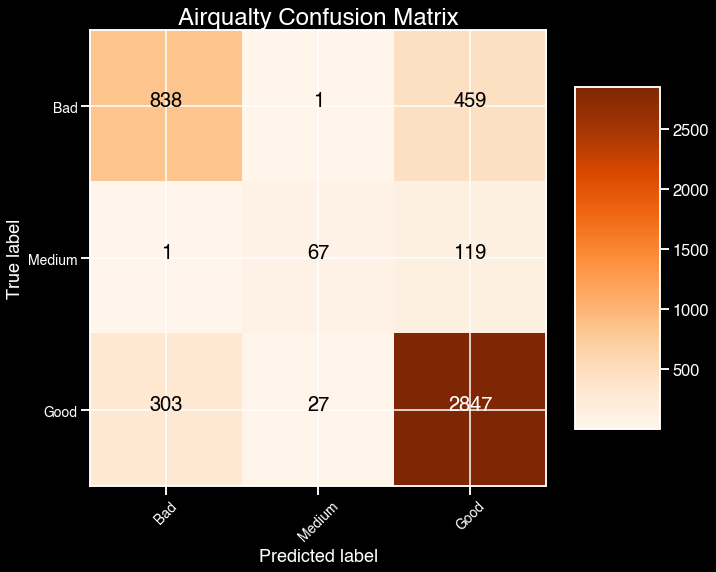

In [88]:
cm = confusion_matrix(y_test_t, y_pred_t)
plot_confusion_matrix(cm, classes = ['Bad','Medium','Good'],
                      title = 'Airqualty Confusion Matrix')